In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/Abnb_paris.csv')

In [ ]:
# Preprocessing: Convert labels to numerical values (0 for negative, 1 for positive)
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review_text'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
print(y_train.isnull().sum())

52


In [ ]:
X_train = X_train.dropna()
y_train = y_train.dropna()

In [ ]:
print(y_train.isnull().sum())
print(X_train.isnull().sum())

0
0


In [ ]:
# Preprocessing: Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build individual classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svm_classifier = SVC(kernel='linear', probability=True)

In [ ]:
# Create ensemble classifier using voting mechanism
ensemble_classifier = VotingClassifier(estimators=[('nb', nb_classifier), ('lr', lr_classifier), ('svm', svm_classifier)], voting='soft')

In [ ]:
# Train the ensemble classifier
ensemble_classifier.fit(X_train_vectorized, y_train)

# Predict on the testing set
y_pred = ensemble_classifier.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Accuracy:", accuracy)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Load the IMDb dataset
data = pd.read_csv("/content/Abnb_paris.csv")

# Data preprocessing
# Implement data preprocessing steps such as removing stopwords, punctuation, and tokenization

# Data preprocessing
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    tokens = [word for word in tokens if word not in punctuation]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to training and testing data
X_train_preprocessed = X_train.apply(preprocess_text)
X_test_preprocessed = X_test.apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review_text'], data['sentiment'], test_size=0.2, random_state=42)

# Feature extraction
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the training data
X_train_count = vectorizer.fit_transform(X_train)
# Transform the test data
X_test_count = vectorizer.transform(X_test)


# Base models
models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear')
}

In [ ]:
threshold = 2.5  # Example threshold
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)


In [ ]:
# Check for missing values in y_train
print("Number of missing values in y_train:", y_train.isnull().sum())

# Drop rows with missing values in both X_train and y_train
X_train = X_train[y_train.notnull()]
y_train = y_train[y_train.notnull()]

# Convert sentiment labels to categorical (0 or 1)
y_train = y_train.map({'negative': 0, 'positive': 1})
y_test = y_test.map({'negative': 0, 'positive': 1})

# Check for missing values in y_train after dropping
print("Number of missing values in y_train after dropping:", y_train.isnull().sum())

Number of missing values in y_train: 52
Number of missing values in y_train after dropping: 0


In [ ]:
# Check for missing values in X_train_tfidf
if X_train_tfidf.count_nonzero() == X_train_tfidf.shape[0] * X_train_tfidf.shape[1]:
    print("No missing values in X_train_tfidf")
else:
    print("Missing values in X_train_tfidf")

Missing values in X_train_tfidf


In [ ]:
# Check the unique values in y_train
print("Unique values in y_train:", y_train.unique())

# Check the unique values in y_test
print("Unique values in y_test:", y_test.unique())


Unique values in y_train: [1.80923355 2.39445305 2.86432218 1.37776712 2.87083545 1.97480161
 2.85275333 2.26192517 1.89230498 3.34305105 2.72133378 1.34869863
 2.83147901 2.70336581 2.93217716 1.71889023 2.62106447 2.22085947
 2.88200197 2.80891703 2.35589108 1.62364874 1.64676171 2.11803788
 1.68841642 3.537711   1.7353747  2.77192785 2.21071222 2.32097614
 2.86239447 1.87044299 2.245883   2.79762178 2.5091372  3.16416029
 2.78691043 2.33736251 2.66436528 2.7602665  3.13709162 3.29043786
 2.01875    1.64524983 2.33024976 1.96860461 2.01115924 2.12726667
 1.83493536 3.10743708 4.14295728 1.74684573]
Unique values in y_test: [2.87656332 2.91748921 3.20894318 2.68652556 1.97289466 2.11068997
 1.38619579 2.33024976 1.37146725 1.4419243  1.76349671 1.72117282
 0.81074132 2.41866416]


In [ ]:
# Convert continuous values to categorical labels
y_train_categorical = pd.cut(y_train, bins=2, labels=[0, 1])
y_test_categorical = pd.cut(y_test, bins=2, labels=[0, 1])


In [ ]:
# Train base models
for name, model in models.items():
    model.fit(X_train_vectorized, y_train_binary)
    y_pred = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test_binary, y_pred)
    print(f"{name} Accuracy: {accuracy}")

# Ensemble methods
ensemble_models = [
    ("Random Forest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Voting Classifier", VotingClassifier(estimators=[('nb', models['Naive Bayes']),
                                                        ('dt', models['Decision Tree']),
                                                        ('svm', models['SVM'])], voting='hard'))
]

# Train ensemble models
for name, model in ensemble_models:
    model.fit(X_train_vectorized, y_train_binary)
    y_pred = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test_binary, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{classification_report(y_test_binary, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_binary, y_pred)}\n")

Naive Bayes Accuracy: 0.7142857142857143
Decision Tree Accuracy: 0.7142857142857143
SVM Accuracy: 1.0
Random Forest Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.75      0.75      0.75         4

    accuracy                           0.86        14
   macro avg       0.82      0.82      0.82        14
weighted avg       0.86      0.86      0.86        14

Confusion Matrix:
[[9 1]
 [1 3]]

AdaBoost Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.80      1.00      0.89         4

    accuracy                           0.93        14
   macro avg       0.90      0.95      0.92        14
weighted avg       0.94      0.93      0.93        14

Confusion Matrix:
[[9 1]
 [0 4]]

Voting Classifier Accuracy: 0.8571428571428571
              precision    recall  f1-score   su

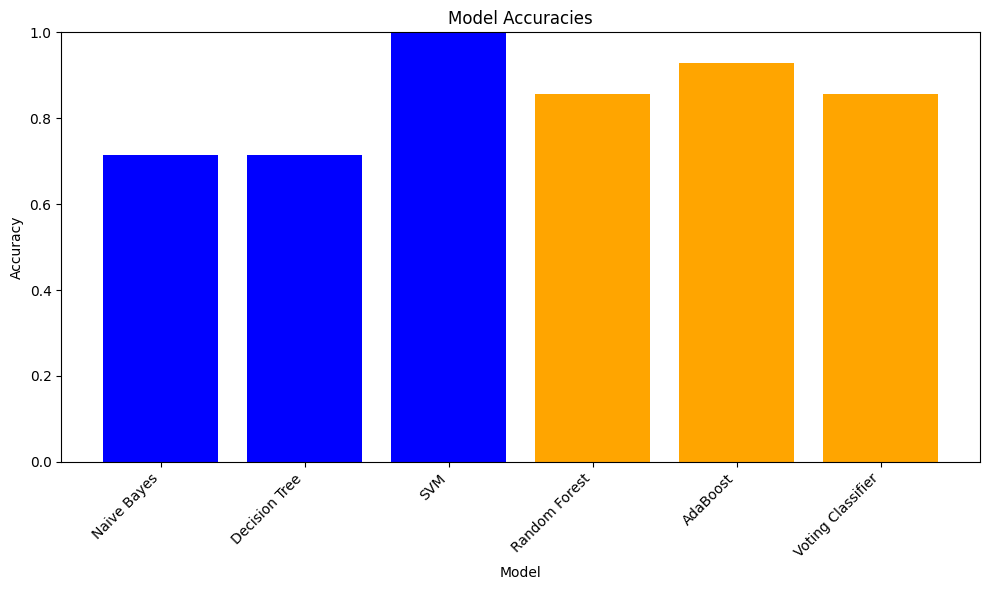

In [ ]:
# Visualization (optional)
# Implement code to visualize performance metrics

import matplotlib.pyplot as plt
base_model_names = list(models.keys())
base_model_accuracies = [accuracy_score(y_test_binary, model.predict(X_test_vectorized)) for name, model in models.items()]

ensemble_model_names = [name for name, _ in ensemble_models]
ensemble_model_accuracies = [accuracy_score(y_test_binary, model.predict(X_test_vectorized)) for name, model in ensemble_models]

all_model_names = base_model_names + ensemble_model_names
all_model_accuracies = base_model_accuracies + ensemble_model_accuracies

plt.figure(figsize=(10, 6))
plt.bar(all_model_names, all_model_accuracies, color=['blue' for _ in range(len(base_model_names))] + ['orange' for _ in range(len(ensemble_model_names))])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

The goal of Airbnb’s marketing team in this exercise was to improve its users’ performance so it
could reap the benefits of ongoing host and renter fees. If the company’s hosts were not happy,
they were not likely to continue listing their properties through Airbnb, and in a competitive and
burgeoning marketplace, such attrition could be devastating.

**Answer the following question:**

**1.What could the Airbnb marketing team offer to improve its users’ experience? Should it
rank properties it suggested to users based on some metric such as review sentiment? How would review sentiment compare to summary-rating value in terms of its ability to
predict revenues?**

To improve its users' experience, the Airbnb marketing team could offer several strategies like Ranking Properties Based on Review Sentiment. Ranking properties suggested to users based on metrics such as review sentiment could enhance user satisfaction. Positive reviews are likely to indicate a better experience for previous guests, which could lead to higher satisfaction for future guests. However, it's essential to consider the overall sentiment of reviews, including both positive and negative sentiments, to provide a balanced view. another could be the Comparison of Review Sentiment and Summary-Rating Value. Review sentiment could provide additional insights beyond summary-rating value in predicting revenues. Analyzing sentiment can help identify specific strengths and weaknesses of properties, allowing Airbnb to tailor recommendations and address potential areas for improvement.

**2. Given what we know about the performance of properties in Miami and Paris, did Airbnb
need a region-specific strategy? Could the company suggest optimal pricing for hosts, or
suggest other ways hosts could improve overall earnings?
Make sure to back up your claims with statistical results and plots shown in your code.**

Region-Specific Strategy:
Considering the performance of properties in Miami and Paris, Airbnb could benefit from a region-specific strategy to optimize user experience and host earnings like Optimal Pricing Suggestions: Airbnb could suggest optimal pricing for hosts based on market demand, property features, and historical booking data specific to each region. By analyzing pricing trends and demand patterns in Miami and Paris, Airbnb can provide personalized pricing recommendations to hosts, helping them maximize their earnings while remaining competitive in their respective markets. Or Recommendations for Improving Overall Earnings: In addition to pricing suggestions, Airbnb could offer recommendations for hosts to improve overall earnings. This could include suggestions for enhancing property amenities, optimizing listing descriptions, and implementing guest feedback to address areas for improvement.